# Assignment 2: networkX Drawing and Network Properties

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
from networkx import nx

In [2]:
# Util functions 
def netMeta(net):
    meta = {}
    meta["radius"]= nx.radius(net)
    meta["diameter"]= nx.diameter(net)
    meta["eccentricity"]= nx.eccentricity(net)
    meta["center"]= nx.center(net)
    meta["periphery"]= nx.periphery(net)
    meta["density"]= nx.density(net)
    return meta

def netAna(net): 
    cols = ['Node name', "Betweenness centrality", "Degree centrality", "Closeness centrality", "Eigenvector centrality"]
    rows =[]
    print()
    a = nx.betweenness_centrality(net)
    b = nx.degree_centrality(net)
    c = nx.closeness_centrality(net)
    d = nx.eigenvector_centrality(net)
    for v in net.nodes(): 
        temp = []
        temp.append(v)
        temp.append(a[v])
        temp.append(b[v])
        temp.append(c[v])
        temp.append(d[v])
        rows.append(temp)
    df = pd.DataFrame(rows,columns=cols)
    df.set_index('Node name', inplace = True)
    return df

### Assignment question: 
*use the kite graph example in lecture 2 slides page 11-13 to
calculate the network properties.*

First draw the kite graph in the following format

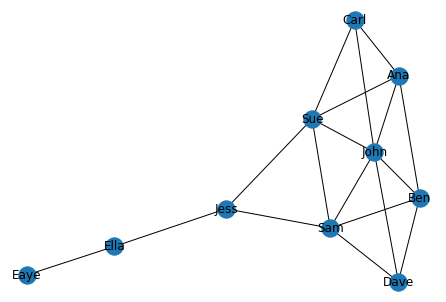

In [3]:
net = nx.krackhardt_kite_graph()
namemap = {0: 'Ana', 1: 'Ben', 2: 'Carl', 3: 'John', 4: 'Dave', 5:'Sue', 6:'Sam',7:'Jess',8:'Ella',9:'Eaye'}
net = nx.relabel_nodes(net, namemap)
nx.draw(net, with_labels=True)
plt.show()

In [4]:
list(nx.connected_components(net))

[{'Ana', 'Ben', 'Carl', 'Dave', 'Eaye', 'Ella', 'Jess', 'John', 'Sam', 'Sue'}]

In [5]:
nx.clustering(net)

{'Ana': 0.6666666666666666,
 'Ben': 0.6666666666666666,
 'Carl': 1.0,
 'John': 0.5333333333333333,
 'Dave': 1.0,
 'Sue': 0.5,
 'Sam': 0.5,
 'Jess': 0.3333333333333333,
 'Ella': 0,
 'Eaye': 0}

In [6]:
netMeta(net)

{'radius': 2,
 'diameter': 4,
 'eccentricity': {'Ana': 4,
  'Ben': 4,
  'Carl': 4,
  'John': 4,
  'Dave': 4,
  'Sue': 3,
  'Sam': 3,
  'Jess': 2,
  'Ella': 3,
  'Eaye': 4},
 'center': ['Jess'],
 'periphery': ['Ana', 'Ben', 'Carl', 'John', 'Dave', 'Eaye'],
 'density': 0.4}

Secondly, calculate the betweenness, degree, closeness, and eigenvector centrality for
each person.

In [7]:
net_stat = netAna(net)
net_stat

,Betweenness centrality,Degree centrality,Closeness centrality,Eigenvector centrality
Node name,,,,
Ana,0.023148,0.444444,0.529412,0.352209
Ben,0.023148,0.444444,0.529412,0.352209
Carl,0.000000,0.333333,0.500000,0.285835
John,0.101852,0.666667,0.600000,0.481020
Dave,0.000000,0.333333,0.500000,0.285835
Sue,0.231481,0.555556,0.642857,0.397691
Sam,0.231481,0.555556,0.642857,0.397691
Jess,0.388889,0.333333,0.600000,0.195862
Ella,0.222222,0.222222,0.428571,0.048075


In [8]:
print("Betweenness centrality")
for name in net.nodes(): print(f'{name}: {net_stat.loc[name, "Betweenness centrality"]:5.3f}')
print("Degree centrality")
for name in net.nodes(): print(f'{name}: {net_stat.loc[name, "Degree centrality"]:5.3f}')
print("Closeness centrality")
for name in net.nodes(): print(f'{name}: {net_stat.loc[name, "Closeness centrality"]:5.3f}')
print("Eigenvector centrality")
for name in net.nodes(): print(f'{name}: {net_stat.loc[name, "Eigenvector centrality"]:5.3f}')

Betweenness centrality
Ana: 0.023
Ben: 0.023
Carl: 0.000
John: 0.102
Dave: 0.000
Sue: 0.231
Sam: 0.231
Jess: 0.389
Ella: 0.222
Eaye: 0.000
Degree centrality
Ana: 0.444
Ben: 0.444
Carl: 0.333
John: 0.667
Dave: 0.333
Sue: 0.556
Sam: 0.556
Jess: 0.333
Ella: 0.222
Eaye: 0.111
Closeness centrality
Ana: 0.529
Ben: 0.529
Carl: 0.500
John: 0.600
Dave: 0.500
Sue: 0.643
Sam: 0.643
Jess: 0.600
Ella: 0.429
Eaye: 0.310
Eigenvector centrality
Ana: 0.352
Ben: 0.352
Carl: 0.286
John: 0.481
Dave: 0.286
Sue: 0.398
Sam: 0.398
Jess: 0.196
Ella: 0.048
Eaye: 0.011
